In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#steps we have to follow 
'''
1. Read the data
2. Understand the data
3. Clean the data 
4. prepare data for modelling
5. Model building 
6. Model Evaluation
7. Making prediction on the test set'''

'\n1. Read the data\n2. Understand the data\n3. Clean the data \n4. prepare data for modelling\n5. Model building \n6. Model Evaluation\n7. Making prediction on the test set'

In [3]:
leads = pd.read_csv(r'G:\python files\lead scoring case study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.describe(include = "all")

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
leads.shape

(9240, 37)

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

# data cleaning

check the number of missing values 

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

lets drop all the columns which have more than 3000 null values. because they are useless to us.

In [10]:
for col in leads.columns:
    if leads[col].isnull().sum()>3000:
        leads.drop(col, axis = 1, inplace = True)
        

In [11]:
leads.shape

(9240, 31)

In [12]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


Checking the null values again.


In [13]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

now drop the columns thats are not useful to us.


In [14]:
leads.drop(['Country'], axis = 1, inplace = True)

In [15]:
leads.drop(['City'], axis = 1, inplace = True)

In [16]:
# now again check the null values 


In [17]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [18]:
#checking the %of missing values.

In [19]:
leads.isnull().sum()/len(leads.index)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [20]:
#LET US CHECK THIS VALUE AT 2 ROUNDS....

In [21]:
round(100*leads.isnull().sum()/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

now we know that some of the columns have the "select" value which is also null so it is good to remove them as well.

In [22]:
## lets figure out the categories into the columns 
for column in leads:
    print(leads[column].astype('category').value_counts())

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

### So ultimately we figure out that how much select values in each column.
## Now we can easily drop them because they are useless to us.
## lead profile,how did you hear about X education,specialization,

In [23]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [24]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [25]:
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [26]:
## now we successfully figure out the select values lets drop all of them.
leads.drop(["Lead Profile","How did you hear about X Education" ], axis = 1, inplace = True)


In [27]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [28]:
## now we figure out that some of the columns in the table still have useless values we can drop them as well.
'''Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations,
Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content,
I agree to pay the amount through cheque.'''

'Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations,\nReceive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content,\nI agree to pay the amount through cheque.'

In [29]:
leads.drop(["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", 
            "Through Recommendations","Receive More Updates About Our Courses", "Update me on Supply Chain Content", 
            "Get updates on DM Content","I agree to pay the amount through cheque"], axis = 1, inplace = True)

In [30]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


## let us drop another column named as "What matters most to you in choosing a course" because it has maximum one type of values.

In [31]:
leads.drop(["What matters most to you in choosing a course"], axis = 1, inplace = True)

In [32]:
#let us check the null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [33]:
##simply we cannot drop the other columns because we already delete lots of them, so we drop only rows so that we cannot loss
#entire column.

In [34]:
#Let us check out how you drop the rows from the table.

In [35]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [36]:
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [37]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [38]:
leads = leads[~pd.isnull(leads["Specialization"])]
leads = leads[~pd.isnull(leads["What is your current occupation"])]

In [39]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [40]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [41]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

all the null values are dropped now we can go for the further processing. in short we successfully clean the data for modelling.

In [42]:
print(len(leads.index))

6373


In [43]:
print(len(leads.index)/9240*100)

68.97186147186147


In [44]:
#let's look at the dataset again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [45]:
##we know that 'prospect id' and 'lead number' won't be any use in the analysis, so its best that we drop these two variables.

In [46]:
leads.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [47]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Prepare the data for modelling

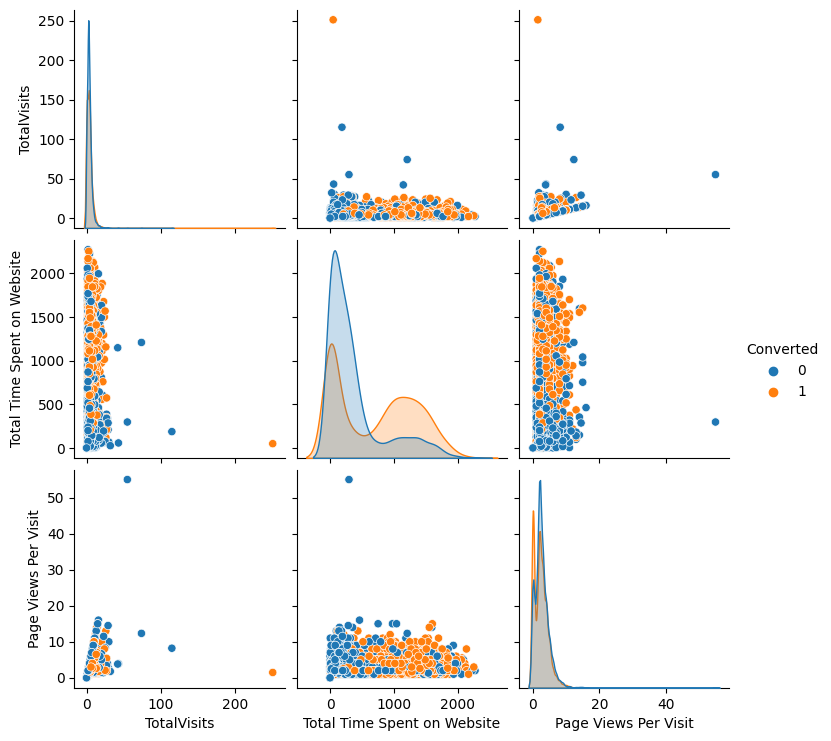

In [48]:
sns.pairplot(leads, diag_kind = 'kde', hue='Converted')
plt.show()

In [49]:
## the next step is to figure out how many categorical variable we have 

In [50]:
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
#lets create a dummy variable using get dummies command.
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True).astype(int)

In [52]:
leads = pd.concat([leads, dummy], axis = 1)

In [53]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [54]:
##creating the dummy variable for 'specilization' because it has the 'select' or 'null' values.


In [55]:
dummy1 = pd.get_dummies(leads['Specialization'], prefix = 'Specialization').astype(int)

In [56]:
dummy1 = dummy1.drop(['Specialization_Select'], axis = 1)


In [57]:
leads = pd.concat([leads, dummy1], axis= 1)

In [58]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [59]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Test - Train Split

In [60]:
#Import the required library.
from sklearn.model_selection import train_test_split

In [61]:
##put all the feature variables in X
## DO remember one thing always put target variable in y


In [62]:
X = leads.drop(["Converted"], axis = 1)

In [63]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#put the target variable into y

In [65]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9235    1
9236    0
9237    0
9239    1
Name: Converted, Length: 6373, dtype: int64

In [67]:
y.info()

<class 'pandas.core.series.Series'>
Index: 6373 entries, 0 to 9239
Series name: Converted
Non-Null Count  Dtype
--------------  -----
6373 non-null   int64
dtypes: int64(1)
memory usage: 99.6 KB


In [68]:
y.shape

(6373,)

In [69]:
##now split the dataset into train and test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [71]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
## few of the columns are on different scale lets rescale them in same scale.


In [73]:
#Import Min-Max Scaler

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [76]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
## now all the columns are on same scale.

In [78]:
###lets build the model.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [79]:
from sklearn.feature_selection import RFE
num_features_to_select = 15
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Social Media', False, 76),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 23),
 ('Lead Source_testone', False, 35),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [81]:
##NOW PUT ALL THE COLUMNS SELECTED BY RFE IN THE VARIABLE "COL"
col = X_train.columns[rfe.support_]

In [82]:
##now select the only columns which are selected by RFE

In [83]:
X_train = X_train[col]


In [84]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
##Import statsmodels
 
import statsmodels.api as sm

In [86]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Tue, 15 Aug 2023   Deviance:                       4134.4
Time:                        09:28:54   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

In [87]:
## now import various inflation factor.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
##make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [90]:
## wow i'm not expecting that all VIFs is in decent range. Not a single vif score is higher than 5.
## so we dont have to drop columns on the basis of VIF.
## now we can drop on some of the columns because of their high p value.


In [91]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [92]:
## Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.8
Date:                Tue, 15 Aug 2023   Deviance:                       4139.6
Time:                        09:28:54   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3668
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9489      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.3097      2.639      3.907      0.000       5.138      15.481
Total Time Spent on Website                              4.3972      0.185     23.710      0.000       4.034       4.761
Lead Origin_Lead Add Form                                4.2368      0.259     16.365      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6359      0.133     12.290      0.000       1.375       1.897
Lead Source_Welingak Website                             2.3482      1.038      2.262      0.024       0.313       4.383
Do Not Email_Yes                                        -1.5182      0.192     -7.896      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   2.7613      0.800      3.452      0.001       1.193       4.329
Last Activity_SMS Sent                                   1.1786      0.082     14.307      0.000       1.017       1.340
Specialization_Select                                   -0.3472      0.098     -3.536      0.000      -0.540      -0.155
What is your current occupation_Housewife               21.6107   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1240      0.634     -1.773      0.076      -2.366       0.118
What is your current occupation_Unemployed              -1.2945      0.598     -2.166      0.030      -2.466      -0.123
What is your current occupation_Working Professional     1.2477      0.626      1.992      0.046       0.020       2.476
Last Notable Activity_Unreachable                        2.7659      0.807      3.428      0.001       1.185       4.347
========================================================================================================================
"""

In [93]:
##now lets drop the another column with high p value.
X_train.drop(["What is your current occupation_Housewife"], axis = 1, inplace = True)

In [94]:
##refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Tue, 15 Aug 2023   Deviance:                       4143.9
Time:                        09:28:54   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4009      0.556     -0.721      0.471      -1.491       0.689
TotalVisits                                             10.1186      2.624      3.856      0.000       4.975      15.262
Total Time Spent on Website                              4.3951      0.185     23.707      0.000       4.032       4.758
Lead Origin_Lead Add Form                                4.2345      0.259     16.363      0.000       3.727       4.742
Lead Source_Olark Chat                                   1.6319      0.133     12.268      0.000       1.371       1.893
Lead Source_Welingak Website                             2.3476      1.038      2.261      0.024       0.313       4.382
Do Not Email_Yes                                        -1.5207      0.192     -7.901      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   2.7626      0.800      3.454      0.001       1.195       4.330
Last Activity_SMS Sent                                   1.1783      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3488      0.098     -3.553      0.000      -0.541      -0.156
What is your current occupation_Student                 -1.6673      0.591     -2.821      0.005      -2.826      -0.509
What is your current occupation_Unemployed              -1.8376      0.552     -3.329      0.001      -2.920      -0.756
What is your current occupation_Working Professional     0.7040      0.583      1.208      0.227      -0.439       1.847
Last Notable Activity_Unreachable                        2.7623      0.807      3.422      0.001       1.180       4.345
========================================================================================================================
"""

In [95]:
X_train.drop(['What is your current occupation_Working Professional'], axis = 1, inplace = True)

In [96]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Tue, 15 Aug 2023   Deviance:                       4145.3
Time:                        09:28:55   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2371      0.196      1.211      0.226      -0.147       0.621
TotalVisits                                   10.0121      2.618      3.825      0.000       4.882      15.143
Total Time Spent on Website                    4.3957      0.185     23.708      0.000       4.032       4.759
Lead Origin_Lead Add Form                      4.2341      0.259     16.364      0.000       3.727       4.741
Lead Source_Olark Chat                         1.6321      0.133     12.275      0.000       1.371       1.893
Lead Source_Welingak Website                   2.3468      1.038      2.260      0.024       0.312       4.382
Do Not Email_Yes                              -1.5182      0.192     -7.891      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation         2.7664      0.800      3.459      0.001       1.199       4.334
Last Activity_SMS Sent                         1.1815      0.082     14.361      0.000       1.020       1.343
Specialization_Select                         -0.3500      0.098     -3.565      0.000      -0.542      -0.158
What is your current occupation_Student       -2.3044      0.283     -8.155      0.000      -2.858      -1.751
What is your current occupation_Unemployed    -2.4751      0.187    -13.230      0.000      -2.842      -2.108
Last Notable Activity_Unreachable              2.7631      0.807      3.422      0.001       1.181       4.346
==============================================================================================================
"""

In [97]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
8,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.08


In [98]:
X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

In [99]:
##Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [100]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.7
Date:                Tue, 15 Aug 2023   Deviance:                       4161.5
Time:                        09:28:55   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3637
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2601      0.196      1.330      0.183      -0.123       0.643
TotalVisits                                    9.9392      2.612      3.806      0.000       4.820      15.058
Total Time Spent on Website                    4.3749      0.185     23.670      0.000       4.013       4.737
Lead Origin_Lead Add Form                      4.2245      0.258     16.344      0.000       3.718       4.731
Lead Source_Olark Chat                         1.6206      0.133     12.226      0.000       1.361       1.880
Lead Source_Welingak Website                   2.3428      1.038      2.257      0.024       0.308       4.378
Do Not Email_Yes                              -1.5255      0.192     -7.941      0.000      -1.902      -1.149
Last Activity_Had a Phone Conversation         2.7484      0.799      3.438      0.001       1.182       4.315
Last Activity_SMS Sent                         1.1665      0.082     14.216      0.000       1.006       1.327
Specialization_Select                         -0.3534      0.098     -3.610      0.000      -0.545      -0.162
What is your current occupation_Student       -2.3146      0.282     -8.201      0.000      -2.868      -1.761
What is your current occupation_Unemployed    -2.4735      0.187    -13.241      0.000      -2.840      -2.107
==============================================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
8,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.08


In [102]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [103]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2209.5
Date:                Tue, 15 Aug 2023   Deviance:                       4419.0
Time:                        09:28:55   Pearson chi2:                 4.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3259
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.9865      0.092    -21.645      0.000      -2.166      -1.807
TotalVisits                                 9.8849      2.569      3.848      0.000       4.850      14.920
Total Time Spent on Website                 4.4491      0.181     24.625      0.000       4.095       4.803
Lead Origin_Lead Add Form                   4.4341      0.254     17.478      0.000       3.937       4.931
Lead Source_Olark Chat                      1.6925      0.130     13.034      0.000       1.438       1.947
Lead Source_Welingak Website                2.1281      1.038      2.051      0.040       0.094       4.162
Do Not Email_Yes                           -1.5156      0.182     -8.340      0.000      -1.872      -1.159
Last Activity_Had a Phone Conversation      2.7422      0.784      3.496      0.000       1.205       4.280
Last Activity_SMS Sent                      1.1606      0.079     14.632      0.000       1.005       1.316
Specialization_Select                      -0.5879      0.096     -6.123      0.000      -0.776      -0.400
What is your current occupation_Student    -0.0303      0.221     -0.137      0.891      -0.464       0.403
===========================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Select,1.64
1,Total Time Spent on Website,1.56
3,Lead Source_Olark Chat,1.47
7,Last Activity_SMS Sent,1.45
2,Lead Origin_Lead Add Form,1.41
0,TotalVisits,1.36
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.05
9,What is your current occupation_Student,1.03
6,Last Activity_Had a Phone Conversation,1.01


In [110]:
# Assuming `X_train` has the correct shape with 11 features
X_train_with_const = sm.add_constant(X_train)  # Add constant term

res = sm.OLS(y_train, X_train_with_const).fit() 
# Make predictions
y_train_pred = res.predict(X_train_with_const)

# Display the first 9 predicted values
print(y_train_pred[:9])

8003    0.384319
218     0.216718
4171    0.185676
4037    0.315738
3660    1.038985
207     0.186042
2044    0.176531
6411    0.631715
6498    0.116788
dtype: float64


In [111]:
##reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38431865, 0.21671781, 0.18567632, 0.31573813, 1.03898472,
       0.18604195, 0.17653071, 0.63171472, 0.11678827, 0.83893825])

In [116]:
#Creating a new dataframe containing the actual  conversion flag and the probabilities predicted by the model.0
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Conversion_Prob":y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.384319
1,0,0.216718
2,1,0.185676
3,1,0.315738
4,1,1.038985


In [136]:
#created new column 'Predicted' with 1 if paid_prob> 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.384319,0
1,0,0.216718,0
2,1,0.185676,0
3,1,0.315738,0
4,1,1.038985,1


In [119]:
#Import matrices from sklearn for evaluation
from sklearn import metrics

In [137]:
#create the confusion matrics
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[1891  421]
 [ 608 1541]]


In [138]:
##lets check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.769334229993275


In [139]:
##let us evaluate the other matrices as well

TP = confusion[1,1]# true positives
TN = confusion[0,0]# True Negatives
FP = confusion[0,1]# false positives
FN = confusion[1,0]# false negatives

In [141]:
##now lets calculate the sensitivity
TP/(TP+FN)

0.7170777105630526

In [142]:
##calculate the specificity
TN/(TN+FP)

0.8179065743944637

In [149]:
##finding the optimal cut-off
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


In [151]:
import matplotlib.pyplot as plt

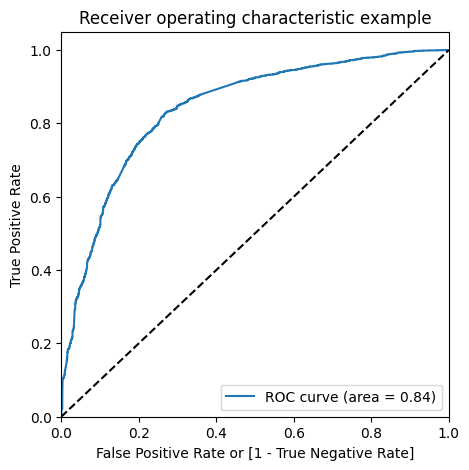

In [152]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [154]:
#Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.384319,0,1,1,1,1,0,0,0,0,0,0
1,0,0.216718,0,1,1,1,0,0,0,0,0,0,0
2,1,0.185676,0,1,1,0,0,0,0,0,0,0,0
3,1,0.315738,0,1,1,1,1,0,0,0,0,0,0
4,1,1.038985,1,1,1,1,1,1,1,1,1,1,1


In [155]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498095  0.999069  0.032439
0.1   0.1  0.536875  0.994416  0.111592
0.2   0.2  0.618920  0.963704  0.298443
0.3   0.3  0.710155  0.921359  0.513841
0.4   0.4  0.777404  0.832480  0.726211
0.5   0.5  0.769334  0.717078  0.817907
0.6   0.6  0.737503  0.574221  0.889273
0.7   0.7  0.692670  0.442997  0.924740
0.8   0.8  0.651872  0.319218  0.961073
0.9   0.9  0.594261  0.174965  0.983997


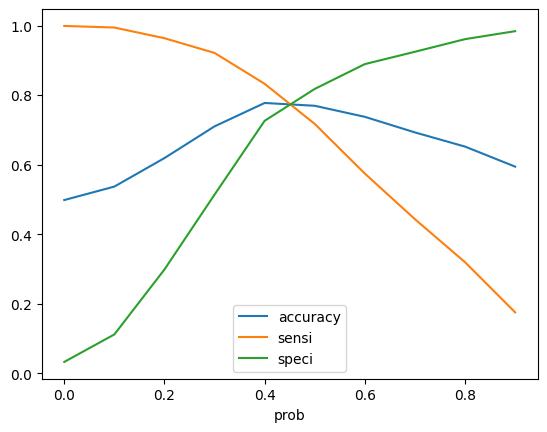

In [156]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.384319,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.216718,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.185676,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.315738,0,1,1,1,1,0,0,0,0,0,0,0
4,1,1.038985,1,1,1,1,1,1,1,1,1,1,1,1


In [158]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7726967047747142

In [160]:
#Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1736,  576],
       [ 438, 1711]], dtype=int64)

In [161]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Calculate Sensitivity

TP/(TP+FN)

0.7961842717543043

In [163]:
# Calculate Specificity

TN/(TN+FP)

0.7508650519031141

# Making Predictions on the Test Set

lets now make predictions on the test set

In [145]:
X_test [["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]] = scaler.transform(X_test[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]])

In [146]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0


In [147]:
## add a constant to X_test.
X_test_sm = sm.add_constant(X_test[col])

In [148]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,1,0,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,1,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,1,0,0,0,1,0,0,0


In [167]:
# Drop the required columns from X_test as well

X_test.drop([ 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [174]:
# Assuming `X_train` has the correct shape with 11 features
X_test_with_const = sm.add_constant(X_test)  # Add constant term

res = sm.OLS(y_test, X_test_with_const).fit() 
# Make predictions
y_test_pred = res.predict(X_test_with_const)

# Display the first 9 predicted values
print(y_test_pred[:9])

4771    1.171573
6122    0.146616
9202    0.689742
6570    0.456808
2668    0.689486
4233    0.711395
3368    0.612251
9091    0.461195
5972    0.368387
dtype: float64


In [175]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Let's see the head

y_pred_1.head()

,0
4771,1.171573
6122,0.146616
9202,0.689742
6570,0.456808
2668,0.689486


In [177]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [178]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [180]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,1.171573
1,0,0.146616
2,0,0.689742
3,1,0.456808
4,1,0.689486


In [181]:
 #Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [182]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [183]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,1.171573,1
1,0,0.146616,0
2,0,0.689742,1
3,1,0.456808,1
4,1,0.689486,1


In [184]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7756276150627615

In [185]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[747, 249],
       [180, 736]], dtype=int64)

In [186]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [187]:
# Calculate sensitivity
TP / float(TP+FN)

0.8034934497816594

In [188]:
# Calculate specificity
TN / float(TN+FP)


0.75

# precision - Recall View

lets now also build the model using the precision- recall view.

In [190]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1891,  421],
       [ 608, 1541]], dtype=int64)

# precision

TP / TP + FP

In [192]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7854230377166157

# Recall


TP / TP + FN

In [193]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7170777105630526

# precision- recall tradeoff

In [195]:
from sklearn.metrics import precision_recall_curve

In [196]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [197]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


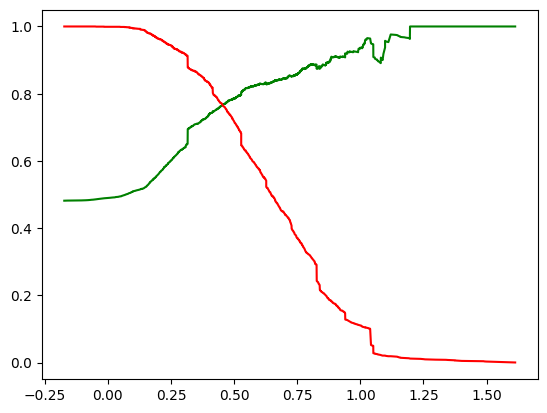

In [198]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [199]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.384319,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.216718,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.185676,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.315738,0,1,1,1,1,0,0,0,0,0,0,0
4,1,1.038985,1,1,1,1,1,1,1,1,1,1,1,1


In [200]:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7735933647164313

In [201]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1778,  534],
       [ 476, 1673]], dtype=int64)

In [202]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Calculate Precision

TP/(TP+FP)

0.7580425917535115

In [204]:
# Calculate Recall

TP/(TP+FN)

0.7785016286644951

# Making Predictions on the Test Set

In [205]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [206]:
y_test_pred[:10]

4771    1.171573
6122    0.146616
9202    0.689742
6570    0.456808
2668    0.689486
4233    0.711395
3368    0.612251
9091    0.461195
5972    0.368387
3631    0.766081
dtype: float64

In [207]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [208]:
# Let's see the head

y_pred_1.head()

,0
4771,1.171573
6122,0.146616
9202,0.689742
6570,0.456808
2668,0.689486


In [209]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [210]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [211]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [212]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,1.171573
1,0,0.146616
2,0,0.689742
3,1,0.456808
4,1,0.689486


In [213]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [214]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.171573
1,0,0.146616
2,0,0.689742
3,1,0.456808
4,1,0.689486


In [215]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [216]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,1.171573,1
1,0,0.146616,0
2,0,0.689742,1
3,1,0.456808,1
4,1,0.689486,1


In [217]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7808577405857741

In [218]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[774, 222],
       [197, 719]], dtype=int64)

In [219]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [220]:
# Calculate Precision

TP/(TP+FP)

0.7640807651434643

In [221]:
# Calculate Recall

TP/(TP+FN)


0.7849344978165939